## Visión por Computadora 1

## Trabajo Práctico N°2

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |

**OBJETIVO**

Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan las cámaras digitales modernas. el video a precesar será: `focus_video.mov`.


1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper "Image Sharpness measure for Blurred Images in Frequency Domain" y realizar tres experimentos:

a) Medición sobre todo el frame.

b) Medifición sobre una ROI ubicada en el centro del frame. Área de la ROI = 5 ó 10% del área total del frame.

Para cada experimento, se debe presentar:

- Una curva o varias curvas que muestren la evolución de la métrica frame a frame donde se vea claramente cuando el algoritmo detecta el punto de máximo enfoque.

El algoritmo de detección a implementar debe detectar y devolver los puntos de mázimo enfoque de manera automática.

**Puntos extra**: Aplicar unsharp masking para expandir la zona de enfoque y devolver.

#### LIBRERÍAS

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Implementación del algoritmo:

In [15]:
def image_quality_measure(img, thres_coef = 1000):
    
    # Paso 1: Calcular la Transformada de Fourier de la imagen
    f = np.fft.fft2(img)
    
    # Paso 2: Centrar la Transformada de Fourier
    fshift = np.fft.fftshift(f)
    
    # Paso 3: Calcular el valor absoluto de la Transformada de Fourier centrada
    af = np.abs(fshift)
    
    # Paso 4: Calcular el valor máximo de la componente de frecuencia
    M = np.max(af)
    
    # Paso 5: Calcular el umbral
    thres = M / thres_coef
    
    # Contar el número de píxeles que superan el umbral
    th = np.sum(af > thres)
    
    # Calcular la medida de calidad de la imagen
    fm = th / (img.shape[0] * img.shape[1])

    return fm

Aplicación sobre todo el frame:

In [16]:
def extract_centered_roi(img, roi_size):

    # Obtener las dimensiones de la imagen
    height, width, = img.shape
    
    # Calcular el tamaño del ROI
    roi_width = int(width * np.sqrt(roi_size))
    roi_height = int(height * np.sqrt(roi_size))
    
    # Calcular las coordenadas del ROI centrado
    x_center = width // 2
    y_center = height // 2
    x1 = x_center - roi_width // 2
    y1 = y_center - roi_height // 2
    x2 = x_center + roi_width // 2
    y2 = y_center + roi_height // 2
    
    # Extraer el ROI
    roi = img[y1:y2, x1:x2]

    return roi

def apply_filter(video_filename, roi_size = 1):
    
    video_capture = cv.VideoCapture(video_filename)
    iqm_by_frame = []
    
    while True:
        ret, frame = video_capture.read()

        if not ret:
            break

        gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        roi_frame = extract_centered_roi(gray_frame, roi_size)
        
        # Calcular la medida de calidad de la imagen para cada frame
        iqm_by_frame.append(image_quality_measure(roi_frame))
        
    return iqm_by_frame

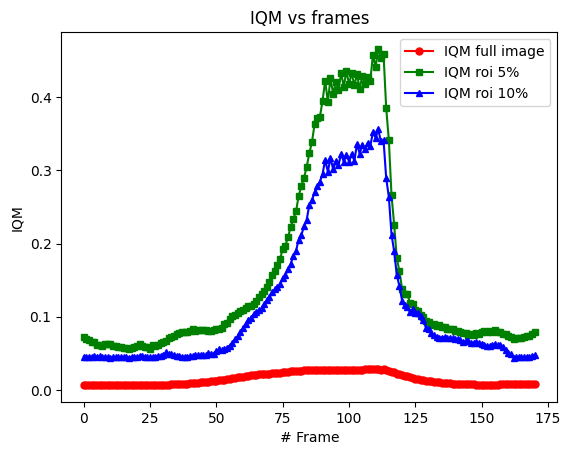

In [17]:
video_filename = 'focus_video.mov'

iqm_by_frame = apply_filter(video_filename, roi_size = 1.00)
iqm_by_frame_005 = apply_filter(video_filename, roi_size = 0.05)
iqm_by_frame_010 = apply_filter(video_filename, roi_size = 0.10)

# Plotear la medida de calidad de la imagen vs frame
plt.plot(range(len(iqm_by_frame)), iqm_by_frame, marker='o', color='r', label='IQM full image', markersize=5)
plt.plot(range(len(iqm_by_frame_005)), iqm_by_frame_005, marker='s', color='g', label='IQM roi 5%', markersize=5)
plt.plot(range(len(iqm_by_frame_010)), iqm_by_frame_010, marker='^', color='b', label='IQM roi 10%', markersize=5)

plt.xlabel('# Frame')
plt.ylabel('IQM')
plt.title('IQM vs frames')
plt.legend()

plt.show()


In [18]:
best_frame_full = iqm_by_frame.index(max(iqm_by_frame))
best_frame_roi005 = iqm_by_frame_005.index(max(iqm_by_frame_005))
best_frame_roi010 = iqm_by_frame_010.index(max(iqm_by_frame_010))
print('Usando la imagen completa, el frame con mejor calidad de imagen es:', best_frame_full)
print('Usando un ROI del 5%, el frame con mejor calidad de imagen es:', best_frame_roi005)
print('Usando un ROI del 10%, el frame con mejor calidad de imagen es:', best_frame_roi010)

Usando la imagen completa, el frame con mejor calidad de imagen es: 109
Usando un ROI del 5%, el frame con mejor calidad de imagen es: 111
Usando un ROI del 10%, el frame con mejor calidad de imagen es: 111


**OBSERVACIONES:**

- Se observa que el frame que mejor hace foco es el # 111.

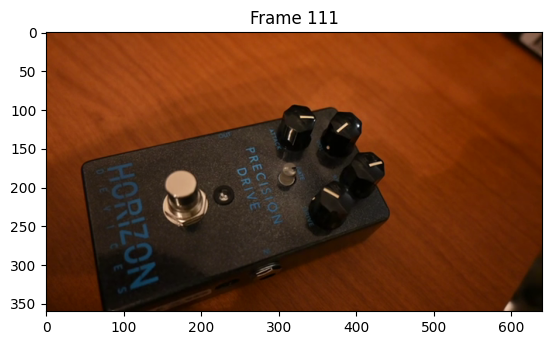

In [ ]:
# Veamos el frame que mejor resultado dio

# Captura del video
video_capture = cv.VideoCapture(video_filename)

# Establecer el índice del frame que deseas leer
video_capture.set(cv.CAP_PROP_POS_FRAMES, best_frame_roi010)

# Leer el frame
ret, frame = video_capture.read()

if ret:
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)
    plt.title(f'Frame {best_frame_roi010}')
    plt.show()